# Compression benchmark 

Jelle Aalbers with updates from Joran Angevaare

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import strax
# ADC->PE conversions for XENON1T
to_pe = 1e-3 * np.array([7.05, 0.0, 0.0, 8.09, 4.38, 7.87, 3.58, 7.5, 7.44, 4.82, 7.07, 5.79,  0.0, 5.55, 7.95, 7.02, 6.39, 8.1, 7.15, 7.43, 7.15, 11.4, 3.97, 7.28,  5.41, 7.4, 0.0, 0.0, 7.04, 7.27, 4.22, 16.79, 4.14, 7.04, 0.0, 5.38,  7.39, 7.02, 4.53, 5.17, 7.13, 5.48, 4.6, 7.33, 6.14, 6.52, 7.59,  4.76, 7.56, 7.54, 4.57, 4.6, 7.12, 8.0, 4.7, 8.68, 3.74, 4.97, 10.36,  7.53, 6.02, 12.45, 0.0, 4.49, 4.82, 0.0, 8.13, 7.27, 3.55, 5.65,  4.55, 8.64, 7.97, 0.0, 3.57, 3.69, 5.87, 5.12, 9.8, 0.0, 5.08, 4.09,  3.87, 8.17, 6.73, 9.03, 0.0, 6.93, 0.0, 6.52, 7.39, 0.0, 4.92, 7.48,  5.82, 4.05, 3.9, 5.77, 8.14, 7.62, 7.61, 5.55, 0.0, 7.12, 5.02, 4.57,  4.46, 7.44, 3.57, 7.58, 7.16, 7.33, 7.69, 6.03, 5.87, 9.64, 4.68,  7.88, 0.0, 10.84, 7.0, 3.62, 7.5, 7.45, 7.69, 7.69, 3.49, 3.61, 7.44,  6.38, 0.0, 5.1, 3.72, 5.22, 0.0, 0.0, 4.43, 0.0, 3.87, 0.0, 3.6,  5.35, 8.4, 5.1, 6.45, 5.07, 4.28, 3.5, 0.0, 7.28, 0.0, 4.25, 0.0,  4.72, 6.26, 7.28, 5.34, 7.55, 3.85, 5.54, 7.5, 7.31, 0.0, 7.76, 7.57,  6.66, 7.29, 0.0, 7.59, 3.8, 3.58, 5.21, 4.29, 7.36, 7.76, 4.0, 6.23,  5.86, 0.0, 7.34, 3.58, 3.57, 5.26, 0.0, 7.67, 4.05, 4.3, 4.21, 7.59,  7.59, 0.0, 6.41, 4.86, 3.73, 5.09, 7.59, 7.64, 7.7, 0.0, 5.25, 8.0,  5.32, 7.91, 0.0, 4.41, 11.82, 0.0, 4.51, 7.05, 8.63, 5.12, 4.45,  4.03, 0.0, 0.0, 3.54, 4.18, 9.5, 3.64, 3.67, 7.28, 3.59, 5.03, 3.6,  5.4, 7.18, 3.73, 6.21, 6.47, 3.7, 7.69, 4.58, 7.46, 6.74, 0.0, 3.66,  7.49, 7.55, 3.64, 0.0, 7.34, 4.06, 3.74, 3.97, 0.0, 4.29, 4.96, 3.77,  8.57, 8.57, 8.57, 8.57, 8.57, 8.57, 214.29, 171.43, 171.43, 171.43,  171.43, 171.43])

In [2]:
source_fn = '/dali/lgrandi/xenonnt/raw/009104-raw_records-rfzvpzj4mf/raw_records-rfzvpzj4mf-000000'
# Measured with pax a few weeks ago, probably on laptop?
zlib_pickles_reduction = (684e6 * 0.183) /300e6 
zlib_pickles_time = 121 * 0.183

# Make data at various reduction levels

No reduction

In [3]:
records_raw = strax.load_file(source_fn, compressor='lz4', dtype=strax.raw_record_dtype())
orig_size_MB = records_raw.nbytes/1e6
orig_size_MB

815.761052

Baselines at start and end of pulse cut

In [4]:
r = strax.raw_to_records(records_raw).copy()
strax.zero_out_of_bounds(r)
strax.baseline(r)

Keep only waveforms of hits

In [5]:
r = strax.sort_by_time(r)
strax.integrate(r)
hits = strax.find_hits(r)
records_cut_hits = strax.cut_outside_hits(r, hits)

As above, and single electron tail cut

In [6]:
from straxen.plugins.pulse_processing import software_he_veto
strax.integrate(r)
r, _, _ = software_he_veto(r, to_pe, strax.endtime(r)[-100:].max())
hits = strax.find_hits(r)
records_cut_tails = strax.cut_outside_hits(r, hits)

/home/angevaare/software/straxen/straxen/plugins/pulse_processing.py:355: RuntimeWarning: divide by zero encountered in true_divide
  regions['data'] /= np.max(regions['data'], axis=1)[:, np.newaxis]
/home/angevaare/software/straxen/straxen/plugins/pulse_processing.py:355: RuntimeWarning: invalid value encountered in true_divide
  regions['data'] /= np.max(regions['data'], axis=1)[:, np.newaxis]


As above, and assume filtering has been done so we need very small extensions

In [7]:
%load_ext snakeviz

In [8]:
%%time
r = strax.raw_to_records(records_raw).copy()
r = strax.sort_by_time(r)
strax.integrate(r)
r, _, _ = software_he_veto(r, to_pe,strax.endtime(r)[-100:].max())
hits = strax.find_hits(r)
records_cut_tails_filtered = strax.cut_outside_hits(r, hits, left_extension=2, right_extension=3)

/home/angevaare/software/straxen/straxen/plugins/pulse_processing.py:355: RuntimeWarning: divide by zero encountered in true_divide
  regions['data'] /= np.max(regions['data'], axis=1)[:, np.newaxis]
/home/angevaare/software/straxen/straxen/plugins/pulse_processing.py:355: RuntimeWarning: invalid value encountered in true_divide
  regions['data'] /= np.max(regions['data'], axis=1)[:, np.newaxis]


CPU times: user 2.25 s, sys: 1.82 s, total: 4.06 s
Wall time: 4.08 s


### Longer/shorter tail cut?
NB: this is crashing on dali, perhaps you want to run this on a stronger machine like Fried Rice


In [9]:
# TODO: numba compilation time goes through the roof if I increase veto_length...

In [10]:
# r = strax.raw_to_records(records_raw).copy()
# r = strax.sort_by_time(r)
# strax.integrate(r)
# r, _, _ = software_he_veto(r, to_pe, strax.endtime(r)[-100:].max(),
#                            veto_length=int(1e5), 
#                            veto_res=int(1e4),   # TODO: HMMMzzz
#                            area_threshold=1e5)
# hits = strax.find_hits(r)
# records_cut_tail_long = strax.cut_outside_hits(r, hits)

In [11]:
# len(records_cut_tail_long)/len(records_cut_tails)

Filtering without tail cut

In [12]:
r = strax.raw_to_records(records_raw).copy()
r = strax.sort_by_time(r)
strax.integrate(r)
hits = strax.find_hits(r)
records_cut_filtered = strax.cut_outside_hits(r, hits, left_extension=2, right_extension=3)

In [13]:
data = dict(raw=records_raw,
            #baseline_cut=records_cut_bl,
            hits_only=records_cut_hits,
            hits_only_filt=records_cut_filtered,
            tail_cut=records_cut_tails,
            tail_cut_filt=records_cut_tails_filtered,
#             tail_cut_long=records_cut_tail_long
           )

## Benchmark compressions

In [20]:
from time import time
import os
from functools import partial

# Add suboptimal compressors, to really show they are suboptimal
import snappy
import zlib
import lz4.frame as lz4
strax.io.COMPRESSORS.update(dict(
    none=dict(compress=lambda x: x, decompress=lambda x: x),
    # zlib 4 matches level used pax in eventbuilder
    zlib1=dict(compress=partial(zlib.compress, level=1), decompress=zlib.decompress),
    zlib4=dict(compress=partial(zlib.compress, level=4), decompress=zlib.decompress),
#     snappy=dict(compress=partial(snappy.compress), decompress=snappy.decompress),
    # Way worse:
    #lz4_minhc=dict(compress=partial(lz4.compress, compression_level=lz4.COMPRESSIONLEVEL_MINHC),
    #               decompress=lz4.decompress)
))

results = []

# TODO n_trials
for condition, d in data.items():
    print(f"\nCondition: {condition}")

    for compressor in list(strax.io.COMPRESSORS.keys()):
        print(compressor)
        fn = f'test_{compressor}'
        t0 = time()
        strax.save_file(fn, d, compressor=compressor)
        t1 = time()
        if condition == 'raw':        
            strax.load_file(fn, compressor=compressor, dtype=strax.raw_record_dtype())
        else:
            strax.load_file(fn, compressor=compressor, dtype=strax.record_dtype())
        t2 = time()

        r = dict(compressor=compressor, condition=condition)
        r['save_speed'] = orig_size_MB / (t1 - t0)
        r['load_speed'] = orig_size_MB / (t2 - t1)
        new_size = os.path.getsize(fn) / 1e6
        r['size_ratio'] =  new_size  / orig_size_MB
        results.append(r)
        
        !rm $fn
        
results = pd.DataFrame(results)


Condition: raw
bz2
zstd
blosc
lz4
none
zlib1
zlib4

Condition: hits_only
bz2
zstd
blosc
lz4
none
zlib1
zlib4

Condition: hits_only_filt
bz2
zstd
blosc
lz4
none
zlib1
zlib4

Condition: tail_cut
bz2
zstd
blosc
lz4
none
zlib1
zlib4

Condition: tail_cut_filt
bz2
zstd
blosc
lz4
none
zlib1
zlib4


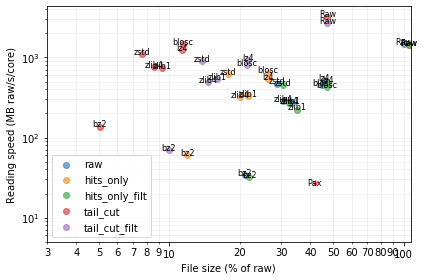

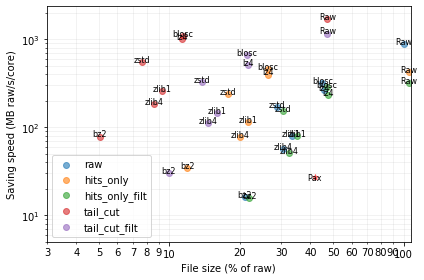

In [21]:
ann_font = dict(fontsize=8, horizontalalignment='center')

for save in False, True:
    for condition in data.keys():
        
#         if condition != 'raw':
#             continue
            
        d = results[results['condition'] == condition]
        x = 100 * d['size_ratio'].values
        y = d['save_speed' if save else 'load_speed'].values
        plt.scatter(x, y, label=condition, alpha=0.6)
        for i, (_, q) in enumerate(d.iterrows()):
            label = dict(none='Raw').get(q['compressor'], q['compressor'])
            plt.annotate(label, (x[i], y[i]),
                         **ann_font)

    pax = (100 * zlib_pickles_reduction, 300/zlib_pickles_time*2)    # *2 since save + load
    plt.scatter([pax[0]], pax[1], marker='*', c='red', alpha=0.5)
    plt.annotate('Pax', pax, verticalalignment='center', **ann_font)

    plt.ylabel(("Saving" if save else "Reading") + " speed (MB raw/s/core)")
    plt.xlabel("File size (% of raw)")
    plt.yscale('log')
    plt.ylim(5, None)
    plt.grid(alpha=0.2, which='both')

    plt.xscale('log')
    plt.legend(loc='best')
    plt.xlim(3, 107)

    ax = plt.gca()
    for axis in [ax.xaxis]:    
        axis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%g'))
        axis.set_minor_formatter(matplotlib.ticker.FormatStrFormatter('%g'))

    plt.tight_layout()
    plt.savefig('compress_benchmark_%s.png' % ('save' if save else 'load'))
    plt.show()

In [22]:
# from multihist import Hist1d
# Hist1d((records_raw['time'] - records_raw['time'][0])[:1000], bins=100).plot()

In [23]:
results[results['compressor'] == 'zstd']

,compressor,condition,save_speed,load_speed,size_ratio
1,zstd,raw,171.721267,471.251767,0.289083
8,zstd,hits_only,237.462941,620.374653,0.178229
15,zstd,hits_only_filt,154.652674,447.893034,0.304997
22,zstd,tail_cut,551.126768,1105.822181,0.076647
29,zstd,tail_cut_filt,325.177005,907.806958,0.137426


In [25]:
results[results['compressor'] == 'lz4']

,compressor,condition,save_speed,load_speed,size_ratio
3,lz4,raw,263.513128,513.342255,0.457519
10,lz4,hits_only,399.057420,539.024701,0.263527
17,lz4,hits_only_filt,232.512852,486.549079,0.477113
24,lz4,tail_cut,1002.740122,1232.273773,0.113427
31,lz4,tail_cut_filt,515.978099,932.498819,0.217193


In [26]:
results[results['compressor'] == 'blosc']

,compressor,condition,save_speed,load_speed,size_ratio
2,blosc,raw,315.730926,447.111854,0.449495
9,blosc,hits_only,461.210721,648.923766,0.264066
16,blosc,hits_only_filt,288.664110,424.708613,0.469960
23,blosc,tail_cut,1089.313436,1465.857915,0.114184
30,blosc,tail_cut_filt,662.585769,796.063236,0.214214
